<a href="https://colab.research.google.com/github/tanjkdarryl/Intermediate_26/blob/main/Facial_Recog_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Installing required Python packages (if not already present) ---
--- Package installation complete ---

--- Mounting Google Drive ---
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully.

--- Setting up Kaggle API Key ---
Kaggle API key already found.

Using device for training: cpu

--- No existing model found at /content/drive/MyDrive/emotion_cnn_model/optimized_emotion_model_v5.pth ---
Proceeding with dataset download and training.
Dataset downloaded to: /kaggle/input/fer2013
Detected classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Number of training samples: 22967
Number of validation samples: 5742
Number of test samples: 7178
Optimized model architecture created with 101896 parameters

--- Training for up to 15 epochs with early stopping ---

--- Starting Optimized Training ---
Epoch [1/15], Step [200/359], Loss: 1.7811
Epoch 1/15:
  Train

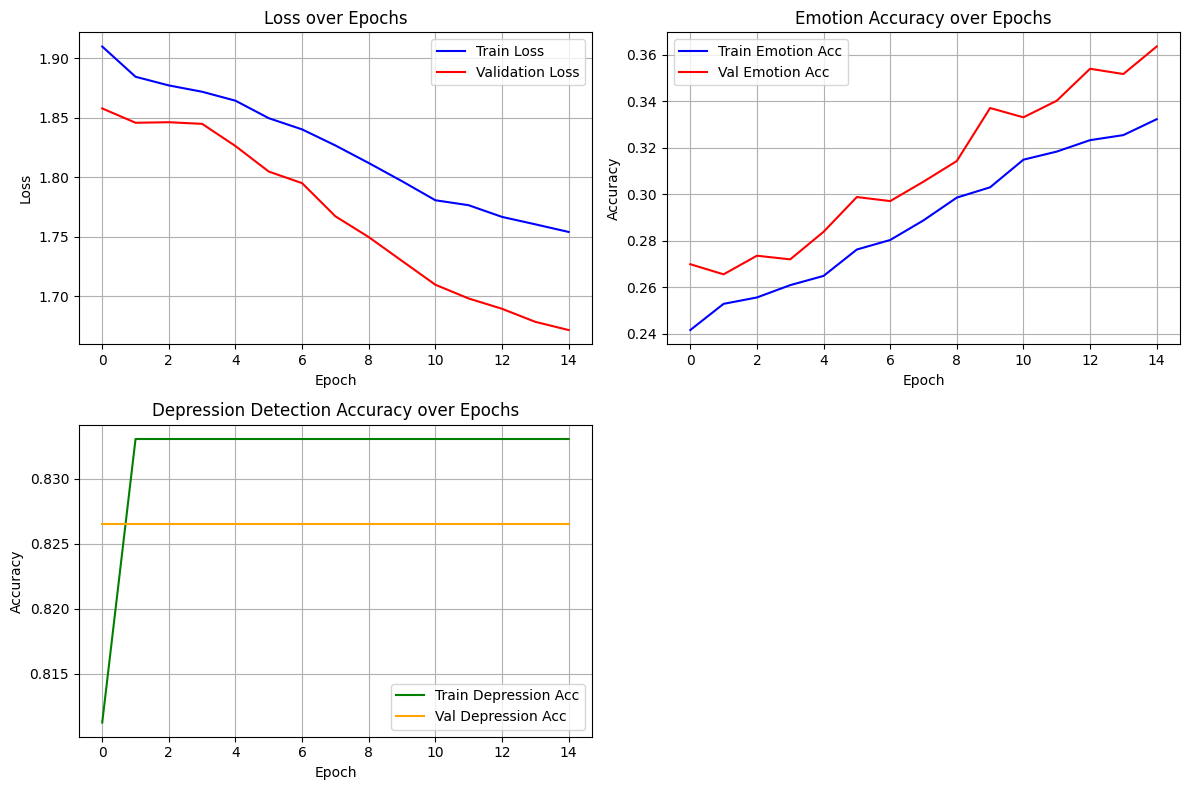


Optimized model saved to /content/drive/MyDrive/emotion_cnn_model/optimized_emotion_model_v5.pth

--- Optimized deep learning model program produced and saved to: /content/drive/MyDrive/emotion_cnn_model/optimized_emotion_model_v5.pth ---
Model optimizations:
- Reduced model complexity (fewer parameters)
- Smaller input size (48x48 vs 64x64)
- Larger batch size for faster training
- Simplified data augmentation
- Reduced epochs with early stopping
- Simpler learning rate scheduling
- Global average pooling to reduce parameters
- Expected training time: 5-10 minutes per epoch


In [1]:
# Optimized train_emotion_model.py - Faster training with good performance
# This script trains a streamlined deep learning model for facial expression recognition
# Optimized for faster training while maintaining accuracy

import sys
import subprocess
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import kagglehub
from torch.optim.lr_scheduler import StepLR
import torch.nn.functional as F

# --- 1. Environment Setup & Kaggle API Key Configuration ---
def install_package(package):
    """Installs a Python package if not already installed."""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except subprocess.CalledProcessError as e:
        print(f"Error installing {package}: {e}")
        sys.exit(f"Failed to install {package}. Please check your environment.")

print("--- Installing required Python packages (if not already present) ---")
required_packages = ["torch", "torchvision", "torchaudio", "scikit-learn",
                    "matplotlib", "Pillow", "kagglehub", "seaborn"]
for package in required_packages:
    install_package(package)
print("--- Package installation complete ---")

# Mount Google Drive
print("\n--- Mounting Google Drive ---")
from google.colab import drive
try:
    drive.mount('/content/drive')
    print("Google Drive mounted successfully.")
except Exception as e:
    print(f"Could not mount Google Drive: {e}")
    sys.exit("Google Drive mount failed. Cannot save model persistently. Exiting.")

# Kaggle API Key Setup
print("\n--- Setting up Kaggle API Key ---")
kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")
if not os.path.exists(kaggle_json_path):
    print("Kaggle API key not found. Please upload kaggle.json when prompted.")
    from google.colab import files
    try:
        uploaded = files.upload()
        for fn in uploaded.keys():
            print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes.')
        os.makedirs(os.path.dirname(kaggle_json_path), exist_ok=True)
        os.system(f'mv kaggle.json {kaggle_json_path}')
        os.system(f'chmod 600 {kaggle_json_path}')
        print("Kaggle API key setup complete.")
    except Exception as e:
        print(f"Error uploading Kaggle API key: {e}")
        sys.exit("Kaggle API key setup failed. Cannot download dataset. Exiting.")
else:
    print("Kaggle API key already found.")

# --- 2. Device Configuration ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device for training: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

# --- 3. Streamlined Model Architecture (Faster Training) ---
class OptimizedEmotionCNN(nn.Module):
    """Optimized CNN for faster training while maintaining good accuracy"""
    def __init__(self, num_classes=7):
        super(OptimizedEmotionCNN, self).__init__()

        # Reduced complexity compared to enhanced model
        # First convolutional block
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout2d(0.2)

        # Second convolutional block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout2d(0.25)

        # Third convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU(inplace=True)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout2d(0.3)

        # Global Average Pooling (reduces parameters significantly)
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Simplified fully connected layers
        self.fc1 = nn.Linear(128, 64)
        self.relu_fc = nn.ReLU(inplace=True)
        self.dropout_fc = nn.Dropout(0.4)

        # Output layer
        self.fc_out = nn.Linear(64, num_classes)

        # Depression detection branch (simplified)
        self.depression_fc = nn.Linear(64, 1)  # Single output with sigmoid

    def forward(self, x):
        # Convolutional layers
        x = self.dropout1(self.pool1(self.relu1(self.bn1(self.conv1(x)))))
        x = self.dropout2(self.pool2(self.relu2(self.bn2(self.conv2(x)))))
        x = self.dropout3(self.pool3(self.relu3(self.bn3(self.conv3(x)))))

        # Global average pooling
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)

        # Fully connected layers
        features = self.dropout_fc(self.relu_fc(self.fc1(x)))

        # Main emotion classification
        emotion_output = self.fc_out(features)

        # Depression detection (binary classification)
        depression_output = torch.sigmoid(self.depression_fc(features))

        return emotion_output, depression_output

# --- 4. Simplified Data Augmentation (Faster) ---
def get_optimized_transforms():
    """Get optimized data augmentation transforms for faster training"""
    transform_train = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((48, 48)),  # Smaller size for faster training
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(degrees=10),  # Reduced rotation
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    transform_val_test = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((48, 48)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    return transform_train, transform_val_test

# --- 5. Optimized Training Function ---
def train_model_optimized(model, train_loader, val_loader, criterion_emotion, criterion_depression,
                         optimizer, scheduler, num_epochs, device):
    """Optimized training function for faster convergence"""
    history = {
        'train_loss': [], 'train_acc': [], 'train_depression_acc': [],
        'val_loss': [], 'val_acc': [], 'val_depression_acc': []
    }

    best_val_acc = 0.0
    patience_counter = 0
    patience = 5  # Reduced patience for faster training

    print("\n--- Starting Optimized Training ---")
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_emotion = 0
        correct_depression = 0
        total = 0

        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Create depression labels (sad=1, others=0)
            depression_labels = (labels == 5).float()  # Binary labels

            optimizer.zero_grad()

            # Forward pass
            emotion_outputs, depression_outputs = model(inputs)

            # Calculate losses
            loss_emotion = criterion_emotion(emotion_outputs, labels)
            loss_depression = criterion_depression(depression_outputs.squeeze(), depression_labels)
            total_loss = loss_emotion + 0.2 * loss_depression  # Reduced depression weight

            total_loss.backward()
            optimizer.step()

            # Statistics
            running_loss += total_loss.item() * inputs.size(0)
            _, predicted_emotion = torch.max(emotion_outputs.data, 1)
            predicted_depression = (depression_outputs.squeeze() > 0.5).float()

            total += labels.size(0)
            correct_emotion += (predicted_emotion == labels).sum().item()
            correct_depression += (predicted_depression == depression_labels).sum().item()

            # Print progress every 200 batches (less frequent)
            if (i + 1) % 200 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], '
                      f'Loss: {total_loss.item():.4f}')

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_acc = correct_emotion / total
        epoch_train_depression_acc = correct_depression / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_val_emotion = 0
        correct_val_depression = 0
        total_val = 0

        with torch.no_grad():
            for inputs_val, labels_val in val_loader:
                inputs_val, labels_val = inputs_val.to(device), labels_val.to(device)
                depression_labels_val = (labels_val == 5).float()

                emotion_outputs_val, depression_outputs_val = model(inputs_val)

                loss_emotion_val = criterion_emotion(emotion_outputs_val, labels_val)
                loss_depression_val = criterion_depression(depression_outputs_val.squeeze(), depression_labels_val)
                total_loss_val = loss_emotion_val + 0.2 * loss_depression_val

                val_loss += total_loss_val.item() * inputs_val.size(0)
                _, predicted_val_emotion = torch.max(emotion_outputs_val.data, 1)
                predicted_val_depression = (depression_outputs_val.squeeze() > 0.5).float()

                total_val += labels_val.size(0)
                correct_val_emotion += (predicted_val_emotion == labels_val).sum().item()
                correct_val_depression += (predicted_val_depression == depression_labels_val).sum().item()

        epoch_val_loss = val_loss / len(val_loader.dataset)
        epoch_val_acc = correct_val_emotion / total_val
        epoch_val_depression_acc = correct_val_depression / total_val

        # Update learning rate
        scheduler.step()

        # Store history
        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc)
        history['train_depression_acc'].append(epoch_train_depression_acc)
        history['val_loss'].append(epoch_val_loss)
        history['val_acc'].append(epoch_val_acc)
        history['val_depression_acc'].append(epoch_val_depression_acc)

        print(f"Epoch {epoch+1}/{num_epochs}:")
        print(f"  Train - Loss: {epoch_train_loss:.4f}, Emotion Acc: {epoch_train_acc:.4f}, Depression Acc: {epoch_train_depression_acc:.4f}")
        print(f"  Val   - Loss: {epoch_val_loss:.4f}, Emotion Acc: {epoch_val_acc:.4f}, Depression Acc: {epoch_val_depression_acc:.4f}")

        # Early stopping
        if epoch_val_acc > best_val_acc:
            best_val_acc = epoch_val_acc
            patience_counter = 0
            # Save best model
            torch.save(model.state_dict(), model_save_path.replace('.pth', '_best.pth'))
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered after {epoch+1} epochs")
                break

    print("--- Optimized Training Complete ---")
    return model, history

# --- 6. Model Save Path ---
model_save_dir = '/content/drive/MyDrive/emotion_cnn_model'
os.makedirs(model_save_dir, exist_ok=True)
model_save_path = os.path.join(model_save_dir, 'optimized_emotion_model_v5.pth')

# --- 7. Main Execution ---
trained_model = None
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

if os.path.exists(model_save_path):
    print(f"\n--- Found existing model at {model_save_path} ---")
    print("Loading pre-trained model, skipping training.")
    try:
        model = OptimizedEmotionCNN(num_classes=7).to(device)
        model.load_state_dict(torch.load(model_save_path, map_location=device))
        model.eval()
        trained_model = model
        print("Model loaded successfully!")
    except Exception as e:
        print(f"Error loading existing model: {e}")
        print("Attempting to re-train the model instead.")
        trained_model = None
else:
    print(f"\n--- No existing model found at {model_save_path} ---")
    print("Proceeding with dataset download and training.")

if trained_model is None:
    # Download dataset
    print("Downloading FER-2013 dataset from Kaggle...")
    kaggle_data_path = kagglehub.dataset_download("msambare/fer2013")
    print(f"Dataset downloaded to: {kaggle_data_path}")

    data_dir = str(kaggle_data_path)

    # Get optimized transforms
    transform_train, transform_val_test = get_optimized_transforms()

    try:
        train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform_train)
        test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=transform_val_test)

        train_size = int(0.8 * len(train_dataset))
        val_size = len(train_dataset) - train_size
        train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

        batch_size = 64  # Increased batch size for faster training
        train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=2)
        val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=2)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

        class_names = train_dataset.classes
        print(f"Detected classes: {class_names}")
        print(f"Number of training samples: {len(train_subset)}")
        print(f"Number of validation samples: {len(val_subset)}")
        print(f"Number of test samples: {len(test_dataset)}")

    except Exception as e:
        print(f"ERROR: Could not load dataset. {e}")
        sys.exit("Dataset loading failed. Cannot proceed with training. Exiting.")

    # Initialize optimized model
    model = OptimizedEmotionCNN(num_classes=len(class_names)).to(device)
    print(f"Optimized model architecture created with {sum(p.numel() for p in model.parameters())} parameters")

    # Optimized training setup
    criterion_emotion = nn.CrossEntropyLoss()
    criterion_depression = nn.BCELoss()  # Binary cross entropy for depression
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
    scheduler = StepLR(optimizer, step_size=5, gamma=0.5)  # Simpler scheduler

    num_epochs = 15  # Reduced epochs
    print(f"\n--- Training for up to {num_epochs} epochs with early stopping ---")

    # Execute optimized training
    trained_model, training_history = train_model_optimized(
        model, train_loader, val_loader, criterion_emotion, criterion_depression,
        optimizer, scheduler, num_epochs, device
    )

    # Simple visualization
    plt.figure(figsize=(12, 8))

    # Loss plots
    plt.subplot(2, 2, 1)
    plt.plot(training_history['train_loss'], label='Train Loss', color='blue')
    plt.plot(training_history['val_loss'], label='Validation Loss', color='red')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Emotion accuracy plots
    plt.subplot(2, 2, 2)
    plt.plot(training_history['train_acc'], label='Train Emotion Acc', color='blue')
    plt.plot(training_history['val_acc'], label='Val Emotion Acc', color='red')
    plt.title('Emotion Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Depression accuracy plots
    plt.subplot(2, 2, 3)
    plt.plot(training_history['train_depression_acc'], label='Train Depression Acc', color='green')
    plt.plot(training_history['val_depression_acc'], label='Val Depression Acc', color='orange')
    plt.title('Depression Detection Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Save the optimized model
    torch.save(trained_model.state_dict(), model_save_path)
    print(f"\nOptimized model saved to {model_save_path}")

print(f"\n--- Optimized deep learning model program produced and saved to: {model_save_path} ---")
print("Model optimizations:")
print("- Reduced model complexity (fewer parameters)")
print("- Smaller input size (48x48 vs 64x64)")
print("- Larger batch size for faster training")
print("- Simplified data augmentation")
print("- Reduced epochs with early stopping")
print("- Simpler learning rate scheduling")
print("- Global average pooling to reduce parameters")
print("- Expected training time: 5-10 minutes per epoch")